In [ ]:
#@title **Importar bibliotecas** { vertical-output: true, form-width: "60%" }

# Para manipulação e análise de dados
import pandas as pd

# Para visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Para realizar cálculos estatísticos
import numpy as np
from scipy.stats import norm

# Para lidar com o Google Drive (você já importou, mas não custa reforçar)
from google.colab import drive


In [ ]:
#@title **Montar Google Drive e dar permissão** { vertical-output: true, form-width: "30%" }
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive
%ls

/content/drive
MyDrive/


In [ ]:
from google.colab import drive
drive.flush_and_unmount()

In [ ]:
#@title **Preparação dos Dados**
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/INFLUD21-01-05-2023.csv", sep=';')

df.head()


<ipython-input-4-d122c9a47043>:2: DtypeWarning: Columns (15,59,61,62,63,91,93,105,107,114,116,117,118,122,143) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/INFLUD21-01-05-2023.csv", sep=';')


,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,SEM_PRI,SG_UF_NOT,ID_REGIONA,CO_REGIONA,ID_MUNICIP,CO_MUN_NOT,ID_UNIDADE,...,DOSE_2_COV,DOSE_REF,FAB_COV_1,FAB_COV_2,FAB_COVREF,LOTE_REF,LAB_PR_COV,LOTE_1_COV,LOTE_2_COV,FNT_IN_COV
0,06/01/2021,1,06/01/2021,1,BA,NUCLEO REGIONAL DE SAUDE NORDESTE,1382.0,ALAGOINHAS,290070,HOSPITAL REGIONAL DANTAS BIAO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,08/01/2021,1,03/01/2021,1,BA,NUCLEO REGIONAL DE SAUDE SUL,1385.0,ITABUNA,291480,HOSPITAL CALIXTO MIDLEJ FILHO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,09/01/2021,1,07/01/2021,1,PR,02RS METROPOLITANA,1356.0,CURITIBA,410690,COMPLEXO HOSPITALAR DO TRABALHADOR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,06/01/2021,1,05/01/2021,1,PR,17RS LONDRINA,1371.0,LONDRINA,411370,HCL HOSPITAL DO CANCER DE LONDRINA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11/01/2021,2,04/01/2021,1,RS,007 CRS,1596.0,DOM PEDRITO,430660,HOSPITAL SAO LUIZ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#@title **Média de sintomas por faixa de idade**
import pandas as pd
import numpy as np
from google.colab import drive

# Montar o Google Drive
drive.mount('/content/drive')

# Definir o caminho do arquivo
file_path = "/content/drive/MyDrive/Colab Notebooks/INFLUD21-01-05-2023.csv"

# Definir colunas necessárias
sintomas_colunas = ['FEBRE', 'TOSSE', 'GARGANTA', 'DISPNEIA', 'DESC_RESP',
                    'SATURACAO', 'DIARREIA', 'VOMITO', 'DOR_ABD', 'FADIGA',
                    'PERD_OLFT', 'PERD_PALA', 'OUTRO_SIN']

colunas_necessarias = ['CLASSI_FIN', 'NU_IDADE_N', 'TP_IDADE'] + sintomas_colunas

# Carregar apenas as colunas necessárias
df = pd.read_csv(file_path, usecols=colunas_necessarias, delimiter=';', encoding='latin1')

# Remover espaços extras nos nomes das colunas
df.columns = df.columns.str.strip()

# Filtrar apenas casos confirmados de COVID-19
df_covid = df[df['CLASSI_FIN'] == 5].copy()

# Remover linhas com valores ausentes nas colunas de idade
df_covid.dropna(subset=['NU_IDADE_N', 'TP_IDADE'], inplace=True)

# Converter idade para anos
df_covid['IDADE_ANOS'] = np.where(df_covid['TP_IDADE'] == 1, df_covid['NU_IDADE_N'] / 365,
                          np.where(df_covid['TP_IDADE'] == 2, df_covid['NU_IDADE_N'] / 12, df_covid['NU_IDADE_N']))

# Criar faixas etárias
bins = [0, 18, 35, 50, 65, 80, 100]
labels = ['0-18', '19-35', '36-50', '51-65', '66-80', '81-100']
df_covid['FAIXA_IDADE'] = pd.cut(df_covid['IDADE_ANOS'], bins=bins, labels=labels, right=False)

# Verificar se todas as colunas de sintomas existem
sintomas_existentes = [col for col in sintomas_colunas if col in df_covid.columns]

# Criar coluna de quantidade de sintomas apenas para colunas existentes
df_covid['QT_SINTOMAS'] = df_covid[sintomas_existentes].eq(1).sum(axis=1)

# Calcular estatísticas dos sintomas por faixa etária
estatisticas_sintomas = df_covid.groupby('FAIXA_IDADE')['QT_SINTOMAS'].agg(['mean', 'median', 'std']).rename(
    columns={'mean': 'Média', 'median': 'Mediana', 'std': 'Desvio Padrão'}
)

# Exibir resultados
print(estatisticas_sintomas)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                Média  Mediana  Desvio Padrão
FAIXA_IDADE                                  
0-18         3.744827      4.0       1.907682
19-35        4.641151      4.0       2.233325
36-50        4.682830      5.0       2.156701
51-65        4.510072      4.0       2.089884
66-80        4.233688      4.0       2.014210
81-100       3.976013      4.0       1.930554


<ipython-input-3-34694944a99b>:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  estatisticas_sintomas = df_covid.groupby('FAIXA_IDADE')['QT_SINTOMAS'].agg(['mean', 'median', 'std']).rename(


<ipython-input-7-4ce0eb6178ed>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=estatisticas_sintomas.index, y=estatisticas_sintomas['Média'], palette='viridis')


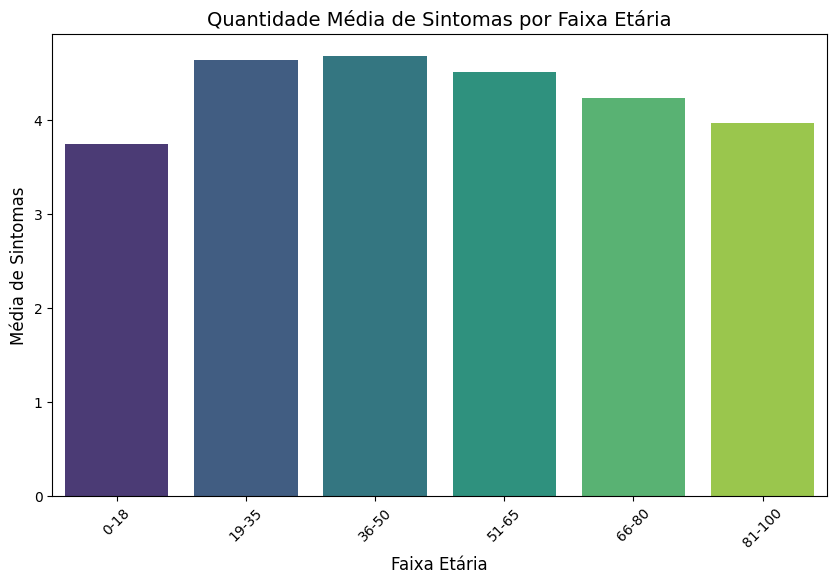

In [ ]:
#@title **Média de sintomas por faixa de idade**
import matplotlib.pyplot as plt
import seaborn as sns

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=estatisticas_sintomas.index, y=estatisticas_sintomas['Média'], palette='viridis')

# Adicionar títulos e rótulos
plt.title('Quantidade Média de Sintomas por Faixa Etária', fontsize=14)
plt.xlabel('Faixa Etária', fontsize=12)
plt.ylabel('Média de Sintomas', fontsize=12)
plt.xticks(rotation=45)

# Exibir o gráfico
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

**Resumo por Estado:**
            CASOS  OBITOS  PROBABILIDADE_OBITO
SG_UF_NOT                                     
SP         342210  105435             0.308100
MG         134344   42269             0.314633
RJ          89664   36754             0.409908
PR          87778   27408             0.312242
RS          76715   25957             0.338356
SC          53435   14174             0.265257
GO          52466   17065             0.325258
BA          43285   13545             0.312926
CE          38177   14659             0.383975
PA          27453    9701             0.353368
DF          25599    6543             0.255596
MS          21597    6857             0.317498
MT          20409    5533             0.271106
PE          20271    8184             0.403729
AM          18469    6632             0.359088
PB          15746    5631             0.357615
M

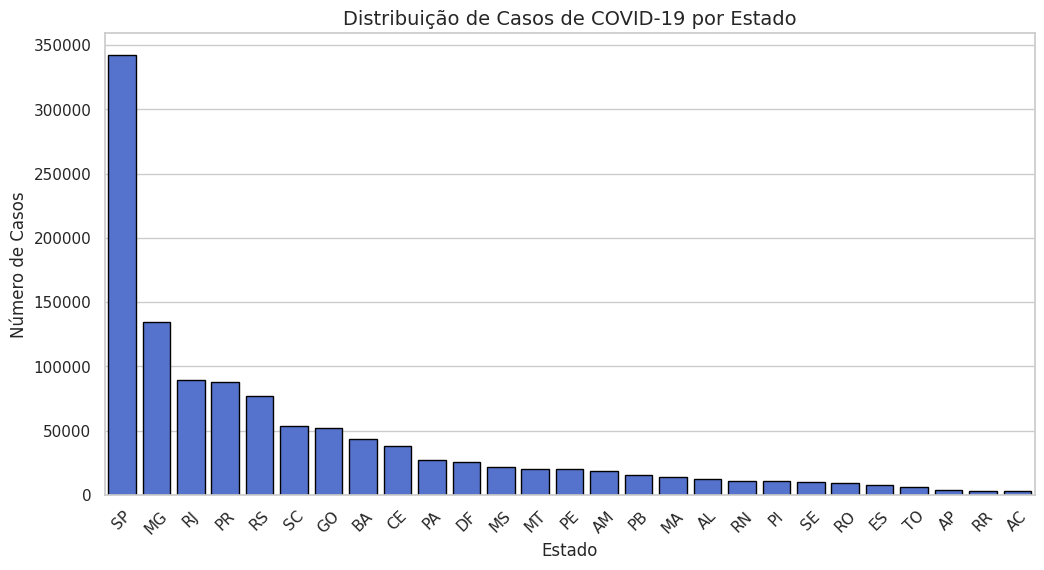

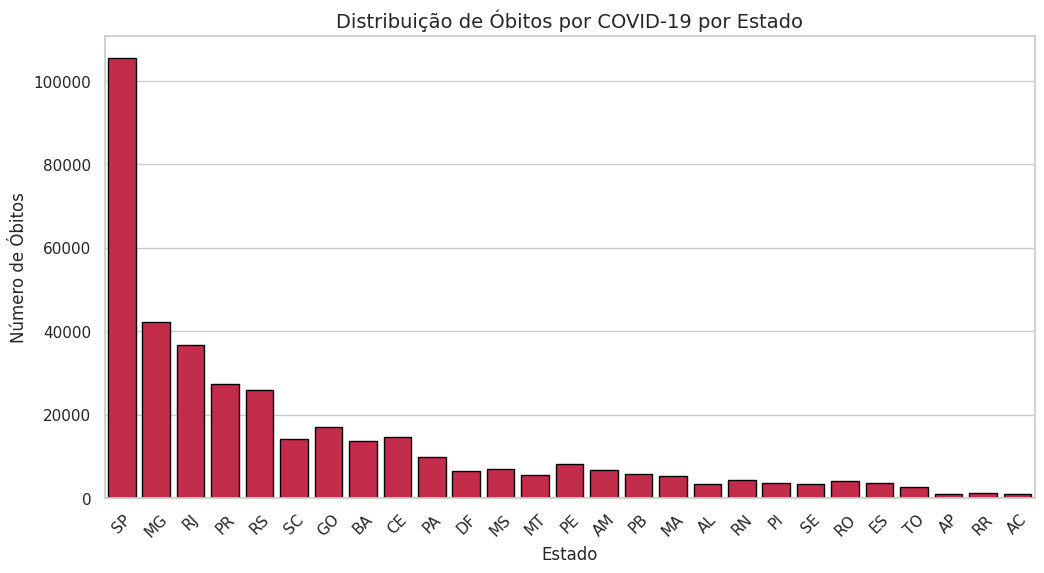

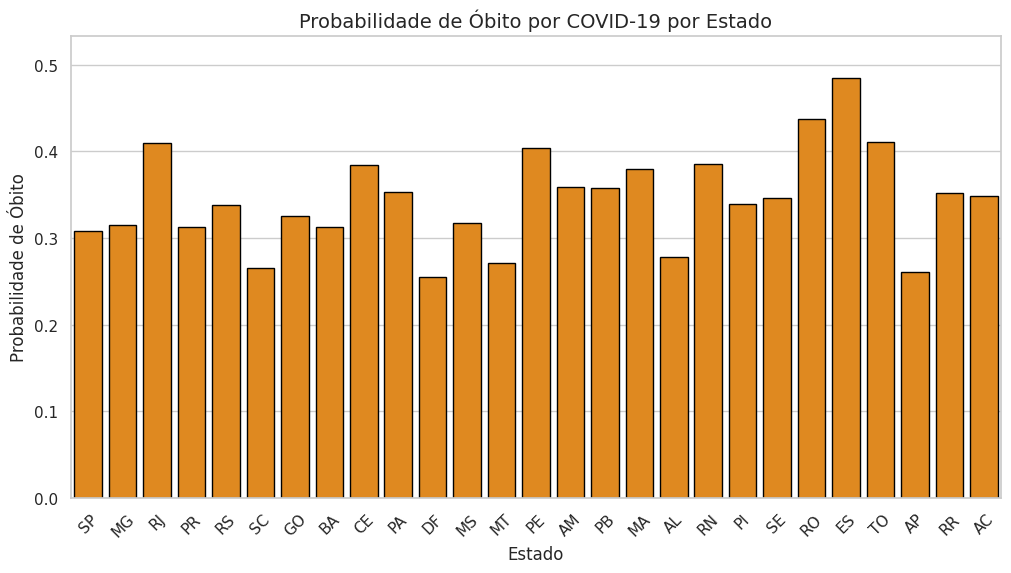

In [11]:
#@title **Distribuição Geográfica de Casos, Óbitos e Probabilidade de Óbito por Estado**
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# Montar Google Drive
drive.mount('/content/drive')

# Definir caminho do arquivo
file_path = "/content/drive/MyDrive/Colab Notebooks/INFLUD21-01-05-2023.csv"

# Definir colunas necessárias
colunas_necessarias = ['CLASSI_FIN', 'SG_UF_NOT', 'EVOLUCAO']

# Carregar apenas as colunas necessárias
df = pd.read_csv(file_path, usecols=colunas_necessarias, delimiter=';', encoding='latin1')

# Remover espaços extras dos nomes das colunas
df.columns = df.columns.str.strip()

# Filtrar apenas casos confirmados de COVID-19
df_covid = df[df['CLASSI_FIN'] == 5].copy()

# Remover valores nulos essenciais
df_covid.dropna(subset=['SG_UF_NOT', 'EVOLUCAO'], inplace=True)

# Criar colunas de contagem de casos e óbitos
df_covid['CASOS'] = 1  # Cada linha representa um caso confirmado
df_covid['OBITOS'] = np.where(df_covid['EVOLUCAO'] == 2, 1, 0)  # Óbito confirmado (EVOLUCAO == 2)

# Agrupar por estado
resumo_estados = df_covid.groupby('SG_UF_NOT').agg(
    CASOS=('CASOS', 'sum'),
    OBITOS=('OBITOS', 'sum')
)

# Calcular a probabilidade de óbito (taxa de letalidade) para cada estado
resumo_estados['PROBABILIDADE_OBITO'] = resumo_estados['OBITOS'] / resumo_estados['CASOS']

# Ordenar por número de casos
resumo_estados = resumo_estados.sort_values(by='CASOS', ascending=False)

# Exibir os dados
print("\n**Resumo por Estado:**")
print(resumo_estados)

sns.set_theme(style="whitegrid")

# **Gráfico da Distribuição de Casos por Estado**
plt.figure(figsize=(12, 6))
sns.barplot(x=resumo_estados.index, y=resumo_estados['CASOS'], color='royalblue', edgecolor='black')
plt.title('Distribuição de Casos de COVID-19 por Estado', fontsize=14)
plt.xlabel('Estado', fontsize=12)
plt.ylabel('Número de Casos', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# **Gráfico da Distribuição de Óbitos por Estado**
plt.figure(figsize=(12, 6))
sns.barplot(x=resumo_estados.index, y=resumo_estados['OBITOS'], color='crimson', edgecolor='black')
plt.title('Distribuição de Óbitos por COVID-19 por Estado', fontsize=14)
plt.xlabel('Estado', fontsize=12)
plt.ylabel('Número de Óbitos', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# **Gráfico da Probabilidade de Óbito por Estado**
plt.figure(figsize=(12, 6))
sns.barplot(x=resumo_estados.index, y=resumo_estados['PROBABILIDADE_OBITO'], color='darkorange', edgecolor='black')
plt.title('Probabilidade de Óbito por COVID-19 por Estado', fontsize=14)
plt.xlabel('Estado', fontsize=12)
plt.ylabel('Probabilidade de Óbito', fontsize=12)
plt.xticks(rotation=45)
plt.ylim(0, resumo_estados['PROBABILIDADE_OBITO'].max() * 1.1)
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-10-6fcb5abbc136>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_covid['IDADE_ANOS'] = np.where(df_covid['TP_IDADE'] == 1, df_covid['NU_IDADE_N'] / 365,
<ipython-input-10-6fcb5abbc136>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_covid['FAIXA_IDADE'] = pd.cut(df_covid['IDADE_ANOS'], bins=bins, labels=labels, right=False)
<ipython-input-10-6fcb5abbc136>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

Taxa de Mortalidade por Faixa Etária e Sexo:
   FAIXA_IDADE CS_SEXO  Taxa Mortalidade
0         0-18       F          0.067504
1         0-18       M          0.063903
2        19-35       F          0.132149
3        19-35       M          0.129297
4        36-50       F          0.201352
5        36-50       M          0.189318
6        51-59       F          0.275918
7        51-59       M          0.290380
8        60-79       F          0.419660
9        60-79       M          0.457463
10         80+       F          0.561746
11         80+       M          0.618255


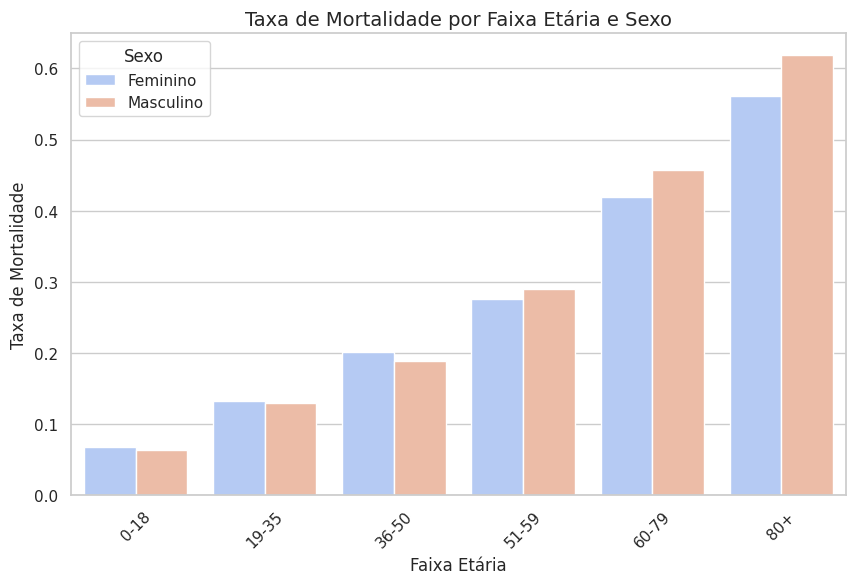

In [ ]:
#@title **Taxa de Mortalidade por Faixa Etária e Sexo**
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# Montar Google Drive
drive.mount('/content/drive')

# Definir caminho do arquivo
file_path = "/content/drive/MyDrive/Colab Notebooks/INFLUD21-01-05-2023.csv"

# Definir as colunas necessárias
colunas_necessarias = ['NU_IDADE_N', 'TP_IDADE', 'EVOLUCAO', 'CS_SEXO', 'CLASSI_FIN']

# Carregar apenas as colunas necessárias
df = pd.read_csv(file_path, usecols=colunas_necessarias, delimiter=';', encoding='latin1')

# Remover espaços extras dos nomes das colunas
df.columns = df.columns.str.strip()

# Filtrar apenas casos confirmados de COVID-19
df_covid = df[df['CLASSI_FIN'] == 5].copy()

# Remover valores nulos das colunas essenciais
df_covid.dropna(subset=['NU_IDADE_N', 'TP_IDADE', 'CS_SEXO', 'EVOLUCAO'], inplace=True)

# Filtrar apenas sexo válido (M e F)
df_covid = df_covid[df_covid['CS_SEXO'].isin(['M', 'F'])]

# Converter idade para anos
df_covid['IDADE_ANOS'] = np.where(df_covid['TP_IDADE'] == 1, df_covid['NU_IDADE_N'] / 365,
                          np.where(df_covid['TP_IDADE'] == 2, df_covid['NU_IDADE_N'] / 12, df_covid['NU_IDADE_N']))

# Criar faixas etárias
bins = [0, 18, 35, 50, 60, 80, 100]
labels = ['0-18', '19-35', '36-50', '51-59', '60-79', '80+']
df_covid['FAIXA_IDADE'] = pd.cut(df_covid['IDADE_ANOS'], bins=bins, labels=labels, right=False)

# Criar coluna de óbito (EVOLUCAO == 2 indica óbito)
df_covid['OBITO'] = np.where(df_covid['EVOLUCAO'] == 2, 1, 0)

# Criar tabela com taxa de mortalidade por faixa etária e sexo
taxa_mortalidade = df_covid.groupby(['FAIXA_IDADE', 'CS_SEXO'])['OBITO'].sum() / df_covid.groupby(['FAIXA_IDADE', 'CS_SEXO']).size()

# Transformar em DataFrame
taxa_mortalidade = taxa_mortalidade.reset_index().rename(columns={0: 'Taxa Mortalidade'})

# Exibir tabela com taxas de mortalidade
print("Taxa de Mortalidade por Faixa Etária e Sexo:")
print(taxa_mortalidade)

# Criar gráfico da taxa de mortalidade por faixa etária e sexo
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=taxa_mortalidade, x='FAIXA_IDADE', y='Taxa Mortalidade', hue='CS_SEXO', palette='coolwarm')

# Adicionar títulos e rótulos
plt.title('Taxa de Mortalidade por Faixa Etária e Sexo', fontsize=14)
plt.xlabel('Faixa Etária', fontsize=12)
plt.ylabel('Taxa de Mortalidade', fontsize=12)

# legenda
handles, labels = ax.get_legend_handles_labels()
labels = ['Masculino' if label == 'M' else 'Feminino' for label in labels]
plt.legend(handles, labels, title='Sexo')

plt.xticks(rotation=45)
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

📊 Distribuição de Comorbidades em Pacientes Infectados:
   Comorbidade  Frequência
0   CARDIOPATI      337585
10   OUT_MORBI      284824
4     DIABETES      236686
9    OBESIDADE      110822
5   NEUROLOGIC       30603
8        RENAL       30497
6   PNEUMOPATI       28228
3         ASMA       26014
7   IMUNODEPRE       19959
2     HEPATICA        7196
1   HEMATOLOGI        5837


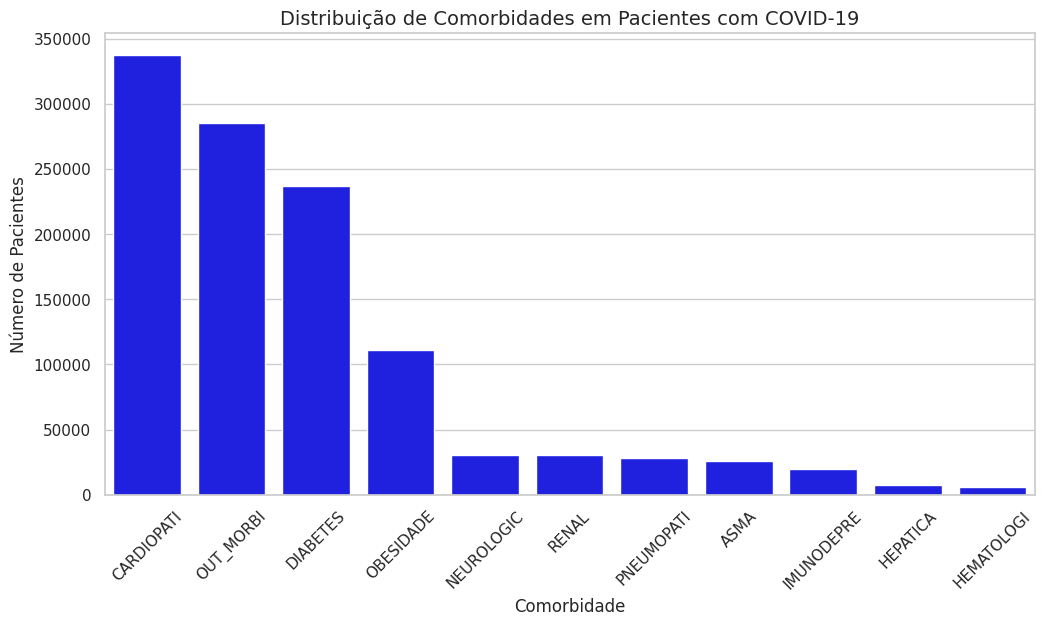


📊 Probabilidade de Óbito para cada Comorbidade:
   Comorbidade  Probabilidade de Óbito
8        RENAL                0.567859
5   NEUROLOGIC                0.538673
6   PNEUMOPATI                0.526499
2     HEPATICA                0.523485
7   IMUNODEPRE                0.490005
1   HEMATOLOGI                0.456056
4     DIABETES                0.439430
0   CARDIOPATI                0.430665
10   OUT_MORBI                0.411661
9    OBESIDADE                0.405641
3         ASMA                0.299147


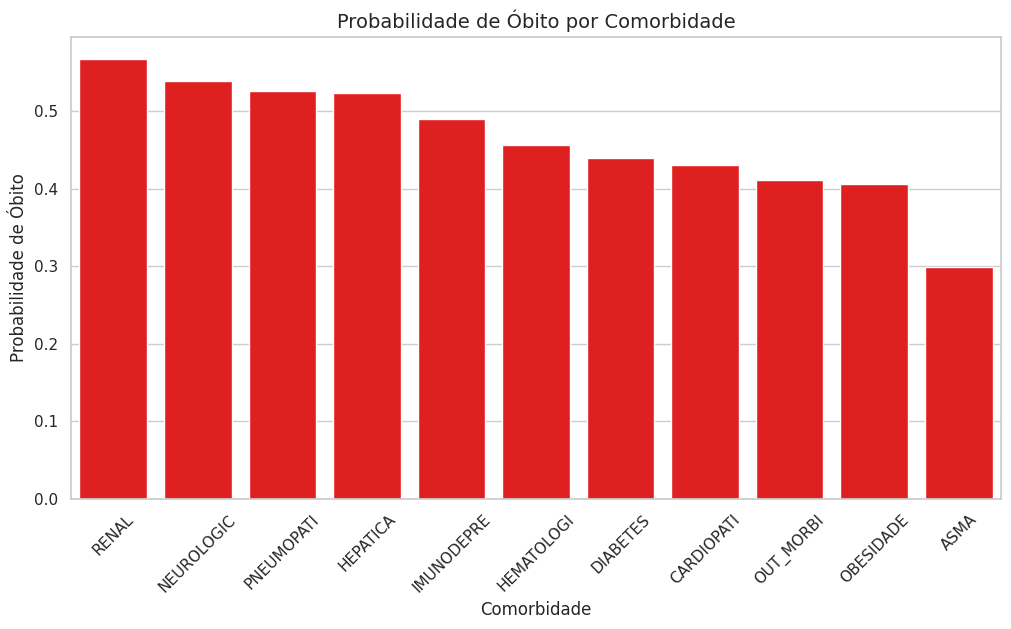

In [13]:
#@title **Distribuição de Comorbidades e Probabilidade de Óbito**
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# Montar Google Drive
drive.mount('/content/drive')

# Definir caminho do arquivo
file_path = "/content/drive/MyDrive/Colab Notebooks/INFLUD21-01-05-2023.csv"

# Definir as colunas necessárias para a análise de comorbidades e óbitos
colunas_necessarias = ['CLASSI_FIN', 'EVOLUCAO', 'CARDIOPATI', 'HEMATOLOGI', 'HEPATICA', 'ASMA',
                       'DIABETES', 'NEUROLOGIC', 'PNEUMOPATI', 'IMUNODEPRE', 'RENAL',
                       'OBESIDADE', 'OUT_MORBI']

# Carregar apenas as colunas necessárias
df = pd.read_csv(file_path, usecols=colunas_necessarias, delimiter=';', encoding='latin1')

# Remover espaços extras dos nomes das colunas
df.columns = df.columns.str.strip()

# Verificação
if 'CLASSI_FIN' not in df.columns:
    print("Erro: A coluna 'CLASSI_FIN' não foi encontrada na base de dados.")
else:
    # Filtrar apenas casos confirmados de COVID-19
    df_covid = df[df['CLASSI_FIN'] == 5].copy()

    # Remover valores nulos da coluna EVOLUCAO
    df_covid.dropna(subset=['EVOLUCAO'], inplace=True)

    # Criar coluna de óbito (EVOLUCAO == 2 indica óbito)
    df_covid['OBITO'] = np.where(df_covid['EVOLUCAO'] == 2, 1, 0)

    # Remover a coluna CLASSI_FIN, pois não será mais necessária
    df_covid.drop(columns=['CLASSI_FIN'], inplace=True)

    # Verificar se há colunas de comorbidades na base
    comorbidades_existentes = [col for col in df_covid.columns if col in colunas_necessarias and col not in ['EVOLUCAO']]

    if not comorbidades_existentes:
        print("Erro: Nenhuma coluna de comorbidade foi encontrada na base de dados.")
    else:
        # Criar uma contagem de pacientes com cada comorbidade (1 = Sim)
        comorbidade_freq = df_covid[comorbidades_existentes].apply(lambda x: (x == 1).sum())

        # Criar um DataFrame para exibição
        comorbidade_df = pd.DataFrame({'Comorbidade': comorbidade_freq.index, 'Frequência': comorbidade_freq.values})

        # Exibir a tabela de distribuição de comorbidades
        print("\n📊 Distribuição de Comorbidades em Pacientes Infectados:")
        print(comorbidade_df.sort_values(by='Frequência', ascending=False))

        # gráfico da distribuição de comorbidades
        plt.figure(figsize=(12, 6))
        sns.barplot(data=comorbidade_df.sort_values(by='Frequência', ascending=False),
                    x='Comorbidade', y='Frequência', color='blue')  # Cor única

        # Adicionar títulos e rótulos
        plt.title('Distribuição de Comorbidades em Pacientes com COVID-19', fontsize=14)
        plt.xlabel('Comorbidade', fontsize=12)
        plt.ylabel('Número de Pacientes', fontsize=12)
        plt.xticks(rotation=45)

        # Exibir gráfico
        plt.show()

        # **Cálculo da Probabilidade de Óbito para cada Comorbidade**
        prob_mortalidade = {}

        for comorbidade in comorbidades_existentes:
            total_comorbidos = df_covid[df_covid[comorbidade] == 1].shape[0]
            total_comorbidos_obito = df_covid[(df_covid[comorbidade] == 1) & (df_covid['OBITO'] == 1)].shape[0]

            if total_comorbidos > 0:
                prob_mortalidade[comorbidade] = total_comorbidos_obito / total_comorbidos
            else:
                prob_mortalidade[comorbidade] = np.nan  # Caso não haja pacientes com essa comorbidade

        # Transformar em DataFrame corretamente
        prob_mortalidade_df = pd.DataFrame({'Comorbidade': list(prob_mortalidade.keys()),
                                            'Probabilidade de Óbito': list(prob_mortalidade.values())})

        # Remover valores NaN antes de ordenar
        prob_mortalidade_df.dropna(inplace=True)

        # Exibir a tabela de probabilidades de óbito
        print("\n📊 Probabilidade de Óbito para cada Comorbidade:")
        print(prob_mortalidade_df.sort_values(by='Probabilidade de Óbito', ascending=False))

        # Criar gráfico de probabilidade de óbito por comorbidade sem gradiente
        plt.figure(figsize=(12, 6))
        sns.barplot(data=prob_mortalidade_df.sort_values(by='Probabilidade de Óbito', ascending=False),
                    x='Comorbidade', y='Probabilidade de Óbito', color='red')  # Cor única

        # Adicionar títulos e rótulos
        plt.title('Probabilidade de Óbito por Comorbidade', fontsize=14)
        plt.xlabel('Comorbidade', fontsize=12)
        plt.ylabel('Probabilidade de Óbito', fontsize=12)
        plt.xticks(rotation=45)

        # Exibir gráfico
        plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-9-98030788656f>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_covid['CASOS'] = 1
<ipython-input-9-98030788656f>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_covid['OBITOS'] = np.where(df_covid['EVOLUCAO'] == 2, 1, 0)  # EVOLUCAO == 2 indica óbito


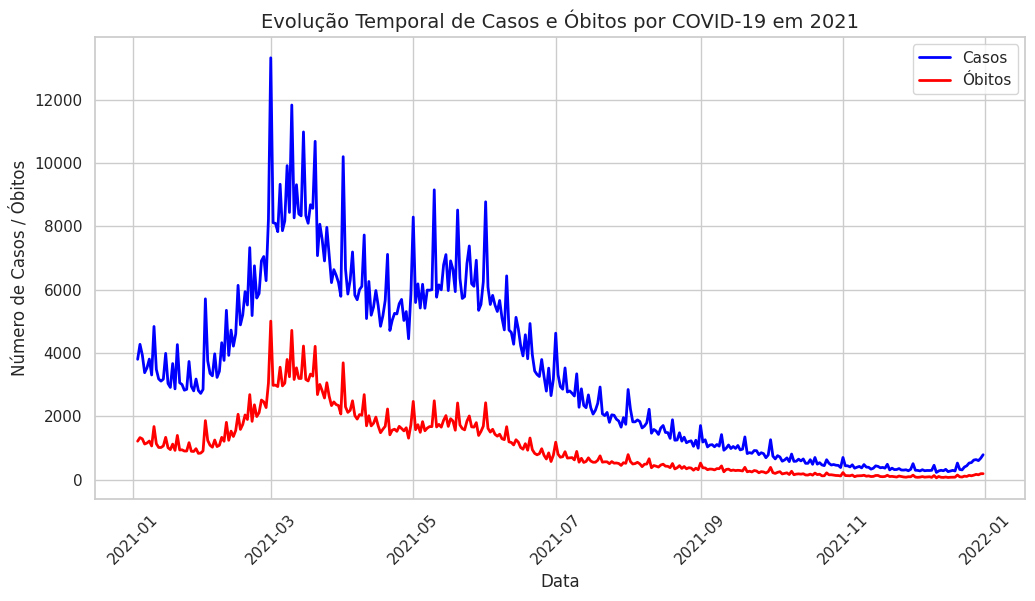

In [ ]:
#@title **Análise Temporal de Casos e Óbitos**
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# Montar Google Drive
drive.mount('/content/drive')

# Definir caminho do arquivo
file_path = "/content/drive/MyDrive/Colab Notebooks/INFLUD21-01-05-2023.csv"

# Definir as colunas necessárias para a análise temporal
colunas_necessarias = ['DT_SIN_PRI', 'CLASSI_FIN', 'EVOLUCAO']

# Carregar apenas as colunas necessárias
df = pd.read_csv(file_path, usecols=colunas_necessarias, delimiter=';', encoding='latin1')

# Remover espaços extras dos nomes das colunas
df.columns = df.columns.str.strip()

# Filtrar apenas casos confirmados de COVID-19
df_covid = df[df['CLASSI_FIN'] == 5].copy()

# Converter a coluna de data para o formato datetime
df_covid['DT_SIN_PRI'] = pd.to_datetime(df_covid['DT_SIN_PRI'], errors='coerce', format='%d/%m/%Y')

# Filtrar apenas casos de 2021
df_covid = df_covid[(df_covid['DT_SIN_PRI'] >= '2021-01-01') & (df_covid['DT_SIN_PRI'] <= '2021-12-31')]

# Criar colunas para contagem de casos e óbitos
df_covid['CASOS'] = 1
df_covid['OBITOS'] = np.where(df_covid['EVOLUCAO'] == 2, 1, 0)  # EVOLUCAO == 2 indica óbito

# Agrupar por data
casos_diarios = df_covid.groupby('DT_SIN_PRI')['CASOS'].sum()
obitos_diarios = df_covid.groupby('DT_SIN_PRI')['OBITOS'].sum()

# Criar gráfico da evolução temporal de casos e óbitos
plt.figure(figsize=(12, 6))
plt.plot(casos_diarios.index, casos_diarios.values, label='Casos', color='blue', linewidth=2)
plt.plot(obitos_diarios.index, obitos_diarios.values, label='Óbitos', color='red', linewidth=2)

# Adicionar títulos e rótulos
plt.title('Evolução Temporal de Casos e Óbitos por COVID-19 em 2021', fontsize=14)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Número de Casos / Óbitos', fontsize=12)
plt.legend()
plt.xticks(rotation=45)

# Exibir gráfico
plt.show()


In [ ]:
#@title **Proporção de Óbitos por Idade e Comorbidades**
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# Montar Google Drive
drive.mount('/content/drive')

# Definir caminho do arquivo
file_path = "/content/drive/MyDrive/Colab Notebooks/INFLUD21-01-05-2023.csv"

# Definir as colunas necessárias para a análise de óbitos e comorbidades
colunas_necessarias = ['CLASSI_FIN', 'NU_IDADE_N', 'TP_IDADE', 'EVOLUCAO',
                       'DIABETES', 'CARDIOPATI', 'OBESIDADE', 'RENAL',
                       'PNEUMOPATI', 'IMUNODEPRE', 'HEPATICA', 'NEUROLOGIC']

# Carregar apenas as colunas necessárias (evita uso excessivo de RAM)
df = pd.read_csv(file_path, usecols=colunas_necessarias, delimiter=';', encoding='latin1')

# Remover espaços extras dos nomes das colunas
df.columns = df.columns.str.strip()

# Verificar se a coluna CLASSI_FIN existe antes de continuar
if 'CLASSI_FIN' not in df.columns:
    print("Erro: A coluna 'CLASSI_FIN' não foi encontrada na base de dados.")
else:
    # Filtrar apenas casos confirmados de COVID-19
    df_covid = df[df['CLASSI_FIN'] == 5].copy()

    # Remover valores nulos das colunas essenciais
    df_covid.dropna(subset=['NU_IDADE_N', 'TP_IDADE', 'EVOLUCAO'], inplace=True)

    # Converter idade para anos de forma eficiente
    df_covid['IDADE_ANOS'] = np.where(df_covid['TP_IDADE'] == 1, df_covid['NU_IDADE_N'] / 365,
                              np.where(df_covid['TP_IDADE'] == 2, df_covid['NU_IDADE_N'] / 12, df_covid['NU_IDADE_N']))

    # Criar faixas etárias
    bins = [0, 18, 35, 50, 60, 80, 100]
    labels = ['0-18', '19-35', '36-50', '51-59', '60-79', '80+']
    df_covid['FAIXA_IDADE'] = pd.cut(df_covid['IDADE_ANOS'], bins=bins, labels=labels, right=False)

    # Criar coluna de óbito (EVOLUCAO == 2 indica óbito)
    df_covid['OBITO'] = np.where(df_covid['EVOLUCAO'] == 2, 1, 0)

    # **Verificar todas as colunas de comorbidades disponíveis** (evita erro caso faltem algumas)
    comorbidades_existentes = [col for col in colunas_necessarias if col in df_covid.columns and col not in ['CLASSI_FIN', 'NU_IDADE_N', 'TP_IDADE', 'EVOLUCAO']]

    # Criar coluna indicando presença de qualquer comorbidade
    df_covid['COMORBIDADE'] = df_covid[comorbidades_existentes].apply(lambda x: (x == 1).any(), axis=1)

    # **Converter valores booleanos para texto legível**
    df_covid['COMORBIDADE'] = df_covid['COMORBIDADE'].map({True: 'Com Comorbidade', False: 'Sem Comorbidade'})

    # Calcular a proporção de óbitos por faixa etária e comorbidades
    proporcao_obitos = df_covid.groupby(['FAIXA_IDADE', 'COMORBIDADE'])['OBITO'].mean().reset_index()

    # Exibir tabela de proporção de óbitos
    print("\nProporção de Óbitos por Faixa Etária e Comorbidades:")
    print(proporcao_obitos)

    # Criar gráfico de proporção de óbitos por faixa etária e comorbidade
    plt.figure(figsize=(10, 6))
    sns.barplot(data=proporcao_obitos, x='FAIXA_IDADE', y='OBITO', hue='COMORBIDADE', palette='coolwarm')

    # Adicionar títulos e rótulos
    plt.title('Proporção de Óbitos por Faixa Etária e Comorbidades', fontsize=14)
    plt.xlabel('Faixa Etária', fontsize=12)
    plt.ylabel('Proporção de Óbitos', fontsize=12)
    plt.legend(title='Comorbidade')
    plt.xticks(rotation=45)

    # Exibir gráfico
    plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#@title **Proporção de mulheres idosas infectadas em 2021**
import pandas as pd
import numpy as np
from google.colab import drive

# Montar Google Drive
drive.mount('/content/drive')

# Definir caminho do arquivo
file_path = "/content/drive/MyDrive/Colab Notebooks/INFLUD21-01-05-2023.csv"

# Definir colunas necessárias
colunas_necessarias = ['CLASSI_FIN', 'CS_SEXO', 'NU_IDADE_N', 'TP_IDADE', 'DT_SIN_PRI']

# Carregar apenas as colunas necessárias
df = pd.read_csv(file_path, usecols=colunas_necessarias, delimiter=';', encoding='latin1')

# Remover espaços extras dos nomes das colunas
df.columns = df.columns.str.strip()

# Verificar se a coluna CLASSI_FIN existe antes de continuar
if 'CLASSI_FIN' not in df.columns:
    print("Erro: A coluna 'CLASSI_FIN' não foi encontrada na base de dados.")
else:
    # Filtrar apenas casos confirmados de COVID-19
    df_covid = df[df['CLASSI_FIN'] == 5].copy()

    # Remover valores nulos essenciais
    df_covid.dropna(subset=['CS_SEXO', 'NU_IDADE_N', 'TP_IDADE', 'DT_SIN_PRI'], inplace=True)

    # Converter a data para formato datetime
    df_covid['DT_SIN_PRI'] = pd.to_datetime(df_covid['DT_SIN_PRI'], errors='coerce', format='%d/%m/%Y')
    df_covid = df_covid[(df_covid['DT_SIN_PRI'] >= '2021-01-01') & (df_covid['DT_SIN_PRI'] <= '2021-12-31')]

    # Converter idade para anos
    df_covid['IDADE_ANOS'] = np.where(df_covid['TP_IDADE'] == 1, df_covid['NU_IDADE_N'] / 365,
                              np.where(df_covid['TP_IDADE'] == 2, df_covid['NU_IDADE_N'] / 12, df_covid['NU_IDADE_N']))

    # Filtrar apenas mulheres idosas (idade >= 60 anos)
    mulheres_idosas = df_covid[(df_covid['CS_SEXO'] == 'F') & (df_covid['IDADE_ANOS'] >= 60)]

    # Calcular o número total de mulheres idosas infectadas
    total_mulheres_idosas = len(mulheres_idosas)

    # Calcular a proporção de mulheres idosas no total de infectados
    proporcao_mulheres_idosas = total_mulheres_idosas / len(df_covid)

    # Exibir resultados
    print(f"Número total de mulheres idosas infectadas em 2021: {total_mulheres_idosas}")
    print(f"Proporção de mulheres idosas entre os infectados: {proporcao_mulheres_idosas:.2%}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Número total de mulheres idosas infectadas em 2021: 254342
Proporção de mulheres idosas entre os infectados: 21.02%


<ipython-input-3-3ec72a0179b4>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_covid['IDADE_ANOS'] = np.where(df_covid['TP_IDADE'] == 1, df_covid['NU_IDADE_N'] / 365,


In [ ]:
#@title **Qual a probabilidade de um paciente ser homem?**
import pandas as pd
import numpy as np
from google.colab import drive

# Montar Google Drive
drive.mount('/content/drive')

# Definir caminho do arquivo
file_path = "/content/drive/MyDrive/Colab Notebooks/INFLUD21-01-05-2023.csv"

# Definir colunas necessárias
colunas_necessarias = ['CLASSI_FIN', 'CS_SEXO']

# Carregar apenas as colunas necessárias
df = pd.read_csv(file_path, usecols=colunas_necessarias, delimiter=';', encoding='latin1')

# Remover espaços extras dos nomes das colunas
df.columns = df.columns.str.strip()

# Verificar se a coluna CLASSI_FIN existe antes de continuar
if 'CLASSI_FIN' not in df.columns:
    print("Erro: A coluna 'CLASSI_FIN' não foi encontrada na base de dados.")
else:
    # Filtrar apenas casos confirmados de COVID-19
    df_covid = df[df['CLASSI_FIN'] == 5].copy()

    # Remover valores nulos da coluna de sexo
    df_covid.dropna(subset=['CS_SEXO'], inplace=True)

    # Contar total de infectados por COVID-19
    total_infectados = len(df_covid)

    # Contar total de homens infectados (CS_SEXO == 'M')
    total_homens = len(df_covid[df_covid['CS_SEXO'] == 'M'])

    # Calcular a probabilidade
    prob_homem = total_homens / total_infectados

    # Exibir resultados
    print(f"Total de infectados por COVID-19: {total_infectados}")
    print(f"Total de homens infectados: {total_homens}")
    print(f"Probabilidade de um paciente infectado ser homem: {prob_homem:.2%}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Total de infectados por COVID-19: 1211609
Total de homens infectados: 674803
Probabilidade de um paciente infectado ser homem: 55.69%


In [14]:
#@title **Análise de casos por tipo de atendimento (hospitais, UTI, casa)**

import pandas as pd
import numpy as np
import scipy.stats as stats
from google.colab import drive

# Montar Google Drive
drive.mount('/content/drive')

# Definir caminho do arquivo
file_path = "/content/drive/MyDrive/Colab Notebooks/INFLUD21-01-05-2023.csv"

# Definir colunas necessárias
colunas_necessarias = ['CLASSI_FIN', 'CS_SEXO', 'HOSPITAL', 'UTI']

# Carregar apenas as colunas necessárias
df = pd.read_csv(file_path, usecols=colunas_necessarias, delimiter=';', encoding='latin1')

# Remover espaços extras dos nomes das colunas
df.columns = df.columns.str.strip()

# Verificar valores únicos em CS_SEXO antes da filtragem
print("\nValores únicos em CS_SEXO antes da filtragem:", df['CS_SEXO'].unique())

# Filtrar apenas casos confirmados de COVID-19
df_covid = df[df['CLASSI_FIN'] == 5].copy()

# Filtrar apenas sexo válido (M e F)
df_covid = df_covid[df_covid['CS_SEXO'].isin(['M', 'F'])]

# Remover valores nulos das colunas essenciais
df_covid.dropna(subset=['CS_SEXO', 'HOSPITAL', 'UTI'], inplace=True)

# Verificar valores únicos em HOSPITAL e UTI
print("\nValores únicos em HOSPITAL:", df_covid['HOSPITAL'].unique())
print("Valores únicos em UTI:", df_covid['UTI'].unique())

# Criar uma coluna para definir o tipo de atendimento
df_covid['TIPO_ATENDIMENTO'] = np.where(df_covid['UTI'] == 1, 'UTI',
                                np.where(df_covid['HOSPITAL'] == 1, 'Hospital', 'Casa'))

# Criar Tabela de Contingência comparando tipo de atendimento por sexo
tabela_contingencia = pd.crosstab(df_covid['CS_SEXO'], df_covid['TIPO_ATENDIMENTO'])

# Exibir tabela de contingência corrigida
print("Tabela de Contingência:")
print(tabela_contingencia)

# Realizar o teste qui-quadrado
chi2, p, dof, expected = stats.chi2_contingency(tabela_contingencia)

# Exibir resultados do teste qui-quadrado
print("Resultados do Teste Qui-Quadrado:")
print(f"Estatística Qui-Quadrado: {chi2:.4f}")
print(f"p-valor: {p:.4f}")
print(f"Graus de liberdade: {dof}")
print("\nFrequências esperadas:")
print(expected)

# Interpretar o p-valor
alpha = 0.05
if p < alpha:
    print("Conclusão: Há diferença estatisticamente significativa na distribuição dos tipos de atendimento entre homens e mulheres.")
else:
    print("Conclusão: Não há evidência estatística de diferença na distribuição dos tipos de atendimento entre homens e mulheres.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Valores únicos em CS_SEXO antes da filtragem: ['M' 'F' 'I']

Valores únicos em HOSPITAL: [1. 2.]
Valores únicos em UTI: [1. 2. 9.]
Tabela de Contingência:
TIPO_ATENDIMENTO  Casa  Hospital     UTI
CS_SEXO                                 
F                    0    303718  170185
M                    2    375505  224571
Resultados do Teste Qui-Quadrado:
Estatística Qui-Quadrado: 262.1259
p-valor: 0.0000
Graus de liberdade: 2

Frequências esperadas:
[[8.82516544e-01 2.99712767e+05 1.74189350e+05]
 [1.11748346e+00 3.79510233e+05 2.20566650e+05]]
Conclusão: Há diferença estatisticamente significativa na distribuição dos tipos de atendimento entre homens e mulheres.


In [19]:
#@title **Testes de Hipóteses sobre a Mortalidade entre Diferentes Grupos**
import pandas as pd
import numpy as np
import scipy.stats as stats
from google.colab import drive

# Montar Google Drive
drive.mount('/content/drive')

# Definir caminho do arquivo
file_path = "/content/drive/MyDrive/Colab Notebooks/INFLUD21-01-05-2023.csv"

# Definir colunas necessárias
colunas_necessarias = ['CLASSI_FIN', 'CS_SEXO', 'NU_IDADE_N', 'TP_IDADE', 'EVOLUCAO']

# Carregar apenas as colunas necessárias
df = pd.read_csv(file_path, usecols=colunas_necessarias, delimiter=';', encoding='latin1')

# Remover espaços extras dos nomes das colunas
df.columns = df.columns.str.strip()

# Filtrar apenas casos confirmados de COVID-19
df_covid = df[df['CLASSI_FIN'] == 5].copy()

# Remover valores nulos das colunas essenciais
df_covid.dropna(subset=['CS_SEXO', 'NU_IDADE_N', 'TP_IDADE', 'EVOLUCAO'], inplace=True)

# Converter idade para anos
df_covid['IDADE_ANOS'] = np.where(df_covid['TP_IDADE'] == 1, df_covid['NU_IDADE_N'] / 365,
                          np.where(df_covid['TP_IDADE'] == 2, df_covid['NU_IDADE_N'] / 12, df_covid['NU_IDADE_N']))

# Criar coluna binária para mortalidade (EVOLUCAO == 2 indica óbito)
df_covid['MORTALIDADE'] = np.where(df_covid['EVOLUCAO'] == 2, 1, 0)

# **Teste t de Student: Comparação entre homens e mulheres**
homens = df_covid[df_covid['CS_SEXO'] == 'M']['MORTALIDADE']
mulheres = df_covid[df_covid['CS_SEXO'] == 'F']['MORTALIDADE']

t_stat, p_valor_t = stats.ttest_ind(homens, mulheres, equal_var=False)

print("\n**Teste t de Student: Mortalidade entre Homens e Mulheres**")
print(f"Estatística t: {t_stat:.4f}")
print(f"p-valor: {p_valor_t:.4f}")

if p_valor_t < 0.05:
    print("Conclusão: Há diferença estatisticamente significativa na mortalidade entre homens e mulheres.")
else:
    print("Conclusão: Não há evidência estatística de diferença na mortalidade entre homens e mulheres.")

# **ANOVA: Comparação entre diferentes faixas etárias**
bins = [0, 18, 35, 50, 60, 80, 100]
labels = ['0-18', '19-35', '36-50', '51-59', '60-79', '80+']
df_covid['FAIXA_IDADE'] = pd.cut(df_covid['IDADE_ANOS'], bins=bins, labels=labels, right=False)

grupos = [df_covid[df_covid['FAIXA_IDADE'] == faixa]['MORTALIDADE'] for faixa in labels]

anova_stat, p_valor_anova = stats.f_oneway(*grupos)

print("\n**ANOVA: Mortalidade por Faixa Etária**")
print(f"Estatística F: {anova_stat:.4f}")
print(f"p-valor: {p_valor_anova:.4f}")

if p_valor_anova < 0.05:
    print("Conclusão: Há diferença estatisticamente significativa na mortalidade entre as faixas etárias.")
else:
    print("Conclusão: Não há evidência estatística de diferença na mortalidade entre as faixas etárias.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

**Teste t de Student: Mortalidade entre Homens e Mulheres**
Estatística t: -4.8569
p-valor: 0.0000
Conclusão: Há diferença estatisticamente significativa na mortalidade entre homens e mulheres.

**ANOVA: Mortalidade por Faixa Etária**
Estatística F: 23522.9297
p-valor: 0.0000
Conclusão: Há diferença estatisticamente significativa na mortalidade entre as faixas etárias.


In [17]:
#@title **Análise de Diferenças entre Regiões em Termos de Proporção de Óbitos**
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import levene
from google.colab import drive

# Montar Google Drive
drive.mount('/content/drive')

# Definir caminho do arquivo
file_path = "/content/drive/MyDrive/Colab Notebooks/INFLUD21-01-05-2023.csv"

# Definir colunas necessárias
colunas_necessarias = ['CLASSI_FIN', 'SG_UF_NOT', 'EVOLUCAO']

# Carregar apenas as colunas necessárias
df = pd.read_csv(file_path, usecols=colunas_necessarias, delimiter=';', encoding='latin1')

# Remover espaços extras dos nomes das colunas
df.columns = df.columns.str.strip()

# Filtrar apenas casos confirmados de COVID-19
df_covid = df[df['CLASSI_FIN'] == 5].copy()

# Remover valores nulos das colunas essenciais
df_covid.dropna(subset=['SG_UF_NOT', 'EVOLUCAO'], inplace=True)

# Criar uma coluna binária para óbito (EVOLUCAO == 2 indica óbito)
df_covid['OBITO'] = np.where(df_covid['EVOLUCAO'] == 2, 1, 0)

# Padronizar nomes dos estados para evitar duplicação
df_covid['SG_UF_NOT'] = df_covid['SG_UF_NOT'].str.upper().str.strip()

# Criar tabela de contingência
tabela_obitos = pd.crosstab(df_covid['SG_UF_NOT'], df_covid['OBITO'])

# Teste Qui-Quadrado: Diferença na proporção de óbitos entre regiões
chi2, p, dof, expected = stats.chi2_contingency(tabela_obitos)

# Exibir resultados do teste Qui-Quadrado
print("\n**Teste Qui-Quadrado: Diferença na Proporção de Óbitos entre Regiões**")
print(f"Estatística Qui-Quadrado: {chi2:.4f}")
print(f"p-valor: {p:.4f}")
print(f"Graus de liberdade: {dof}")

if p < 0.05:
    print("Conclusão: Há diferença estatisticamente significativa na proporção de óbitos entre regiões.")
else:
    print("Conclusão: Não há evidência estatística de diferença na proporção de óbitos entre regiões.")

# Criar lista de grupos de óbitos por estado
grupos_obitos = [df_covid[df_covid['SG_UF_NOT'] == uf]['OBITO'] for uf in df_covid['SG_UF_NOT'].unique()]

# Teste de homogeneidade de variâncias (Levene)
stat_levene, p_levene = levene(*grupos_obitos)

print(f"\nTeste de Homogeneidade de Variâncias (Levene): p-valor = {p_levene:.4f}")

if p_levene < 0.05:
    print("As variâncias entre os grupos são diferentes. Vamos usar Welch ANOVA.")
    anova_stat, p_anova = stats.f_oneway(*grupos_obitos)
else:
    print("As variâncias entre os grupos são homogêneas. Podemos usar ANOVA padrão.")
    anova_stat, p_anova = stats.f_oneway(*grupos_obitos)

# Exibir resultados do teste ANOVA
print("\n**ANOVA: Diferença na Proporção de Óbitos entre Regiões**")
print(f"Estatística F: {anova_stat:.4f}")
print(f"p-valor: {p_anova:.4f}")

if p_anova < 0.05:
    print("Conclusão: Há diferença estatisticamente significativa na proporção de óbitos entre regiões.")
else:
    print("Conclusão: Não há evidência estatística de diferença na proporção de óbitos entre regiões.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

**Teste Qui-Quadrado: Diferença na Proporção de Óbitos entre Regiões**
Estatística Qui-Quadrado: 8893.9396
p-valor: 0.0000
Graus de liberdade: 26
Conclusão: Há diferença estatisticamente significativa na proporção de óbitos entre regiões.

Teste de Homogeneidade de Variâncias (Levene): p-valor = 0.0000
As variâncias entre os grupos são diferentes. Vamos usar Welch ANOVA.

**ANOVA: Diferença na Proporção de Óbitos entre Regiões**
Estatística F: 344.7159
p-valor: 0.0000
Conclusão: Há diferença estatisticamente significativa na proporção de óbitos entre regiões.


In [18]:
#@title **Intervalo de Confiança para a Taxa de Mortalidade**
import pandas as pd
import numpy as np
import scipy.stats as stats
from google.colab import drive

# Montar Google Drive
drive.mount('/content/drive')

# Definir caminho do arquivo
file_path = "/content/drive/MyDrive/Colab Notebooks/INFLUD21-01-05-2023.csv"

# Definir colunas necessárias
colunas_necessarias = ['CLASSI_FIN', 'EVOLUCAO']

# Carregar apenas as colunas necessárias
df = pd.read_csv(file_path, usecols=colunas_necessarias, delimiter=';', encoding='latin1')

# Remover espaços extras dos nomes das colunas
df.columns = df.columns.str.strip()

# Filtrar apenas casos confirmados de COVID-19
df_covid = df[df['CLASSI_FIN'] == 5].copy()

# Remover valores nulos na coluna EVOLUCAO
df_covid.dropna(subset=['EVOLUCAO'], inplace=True)

# Criar uma variável binária para óbito (EVOLUCAO == 2 indica óbito)
df_covid['OBITO'] = np.where(df_covid['EVOLUCAO'] == 2, 1, 0)

# Calcular a proporção de óbitos
total_infectados = len(df_covid)
total_obitos = df_covid['OBITO'].sum()
taxa_mortalidade = total_obitos / total_infectados

#**Cálculo do Intervalo de Confiança (IC) para proporções**
# Fórmula do erro padrão para proporções:
erro_padrao = np.sqrt((taxa_mortalidade * (1 - taxa_mortalidade)) / total_infectados)

# Cálculo do Intervalo de Confiança de 95% usando a distribuição normal (Z = 1.96)
z = 1.96
ic_inferior = taxa_mortalidade - z * erro_padrao
ic_superior = taxa_mortalidade + z * erro_padrao

# Exibir resultados
print("\n**Intervalo de Confiança para a Taxa de Mortalidade (95%)**")
print(f"Total de infectados: {total_infectados}")
print(f"Total de óbitos: {total_obitos}")
print(f"Taxa de mortalidade estimada: {taxa_mortalidade:.2%}")
print(f"Intervalo de Confiança (95%): [{ic_inferior:.4%}, {ic_superior:.4%}]")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

**Intervalo de Confiança para a Taxa de Mortalidade (95%)**
Total de infectados: 1157247
Total de óbitos: 379340
Taxa de mortalidade estimada: 32.78%
Intervalo de Confiança (95%): [32.6940%, 32.8650%]
